In [145]:
# Loading in data and libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Loading in the dataset
VoterData = pd.read_csv('/Users/student/Downloads/MachineLearning/VoterListExportPostElection.csv')




/var/folders/sx/6ycmf5n92f9cpmk2qzxr4sv00000gn/T/ipykernel_1712/2882412051.py:10: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  VoterData = pd.read_csv('/Users/student/Downloads/MachineLearning/VoterListExportPostElection.csv')


In [146]:
# Creates a  new  column of generation labels based on when someone was born
breaks = [1901, 1927, 1945, 1964, 1980, 1996, 2012, 2024]
labels = ["Greatest", "Silent", "Baby Boomer", "Gen X", "Millennials","Gen Z", "Gen Alpha"]

VoterData['Generation'] = pd.cut(VoterData['BirthYear'], bins=breaks, labels=labels, right = False)

VoterData.head(3)

,VoterIdent,PrecinctNum,PrecinctSplit,PrecinctName,RegisteredDate,FirstName,MiddleName,LastName,SuffixName,MiddleName.1,...,2023 August Election,PRIMARY_MAY_2023,GENERAL_NOV_2022,AUG PRIMARY ELECTION 2022,PRIMARY_MAY_2022,GENERAL_NOV_2021,PRIMARY_MAY_2021,GENERAL_NOV_2020,SPECIAL_AUG_2020,Generation
0,1885774,2607,0,CINCINNATI 26-G,1/28/2016,LHOUCINE,NaN,AACHAQ,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gen X
1,2087869,2506,0,CINCINNATI 25-F,10/04/2021,LAURRA MICHELLE,NaN,AAGAARD,NaN,NaN,...,NaN,NaN,P-U,NaN,NaN,NaN,NaN,NaN,NaN,Baby Boomer
2,2100228,8707,0,SPRINGFIELD G,6/09/2022,ALICEN ROSEMARY TISCH,NaN,AALAEI,NaN,NaN,...,P-U,NaN,P-U,NaN,NaN,NaN,NaN,NaN,NaN,Millennials


/var/folders/sx/6ycmf5n92f9cpmk2qzxr4sv00000gn/T/ipykernel_1712/703375912.py:10: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  VoterData = pd.read_csv('/Users/student/Downloads/MachineLearning/VoterListExportPostElection.csv')


Accuracy: 0.857125115909392

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.57      0.72     39686
           1       0.82      1.00      0.90     81098

    accuracy                           0.86    120784
   macro avg       0.91      0.78      0.81    120784
weighted avg       0.88      0.86      0.84    120784


Decision Tree Rules:
 |--- Status_I <= 0.81
|   |--- PartyCode_N <= -0.69
|   |   |--- Generation_Gen Z <= 0.87
|   |   |   |--- Generation_Silent <= 2.04
|   |   |   |   |--- Senate_SESE09 <= 0.18
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Senate_SESE09 >  0.18
|   |   |   |   |   |--- class: 1
|   |   |   |--- Generation_Silent >  2.04
|   |   |   |   |--- PrecinctName_NO COLL HILL 2-A <= 11.88
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- PrecinctName_NO COLL HILL 2-A >  11.88
|   |   |   |   |   |--- class: 0
|   |   |--- Generation_Gen Z >  0.87
|   |   |   |--- PrecinctName_CINCINNATI 

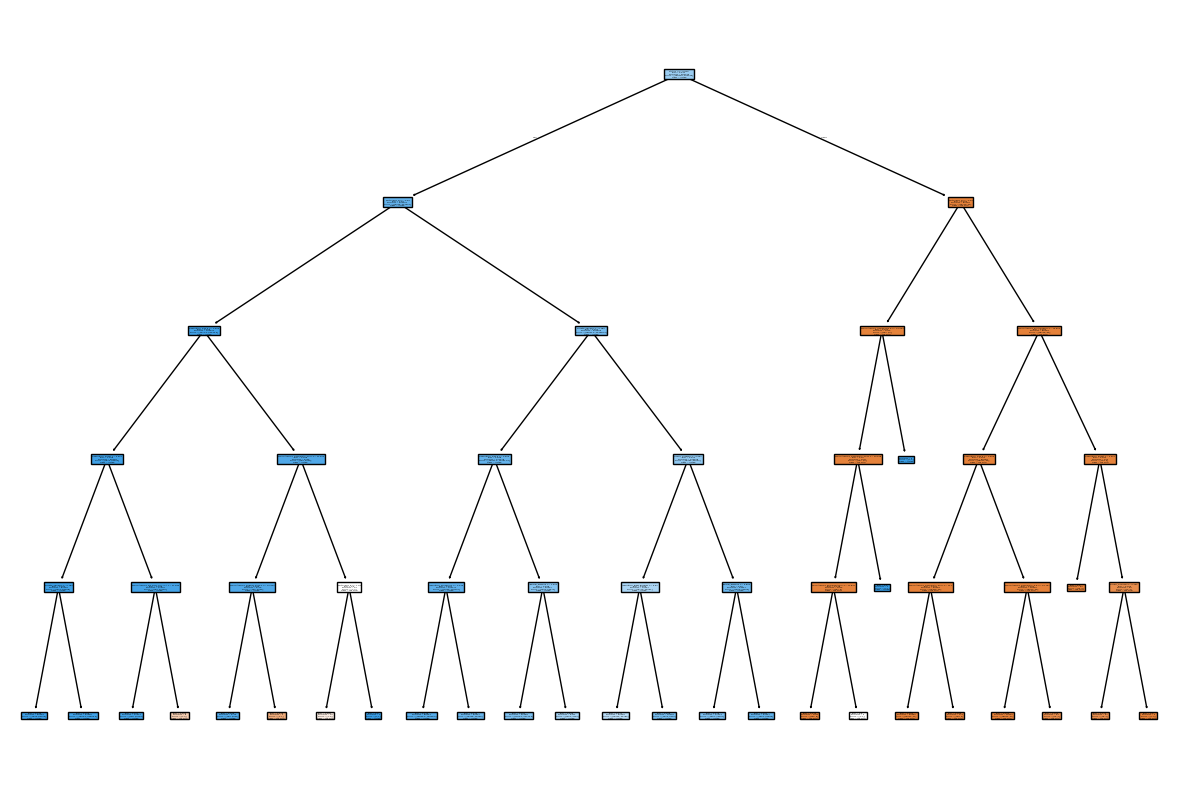


Feature Importances:
                      Feature  Importance
561                 Status_I    0.895749
562              PartyCode_N    0.051695
572            Senate_SESE09    0.020781
574             House_HSHD26    0.013660
568         Generation_Gen Z    0.007831
..                       ...         ...
19   PrecinctName_ANDERSON J    0.000000
603            School_SCWWSD    0.000000
604            School_SCWYSD    0.000000
605            School_VSIHSD    0.000000
18   PrecinctName_ANDERSON I    0.000000

[607 rows x 2 columns]


In [147]:
# First Algorithm - Decision Tree 1 includes all features minus target column(2024 Election Year)
# Updated one that is running - Decision Tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Loading in dataset
VoterData = pd.read_csv('/Users/student/Downloads/MachineLearning/VoterListExportPostElection.csv')

# Creates a  new  column of generation labels based on when someone was born.
breaks = [1901, 1927, 1945, 1964, 1980, 1996, 2012, 2024]
labels = ["Greatest", "Silent", "Baby Boomer", "Gen X", "Millennials","Gen Z", "Gen Alpha"]

VoterData['Generation'] = pd.cut(VoterData['BirthYear'], bins=breaks, labels=labels, right = False)

# Define our target and feature columns
target_col = '2024 General Election' 
feature_cols = ['PrecinctName', 'Status', 'PartyCode', 'Generation', 'Congress', 'Senate', 'House', 'Judicial', 'School']

# Changing map turnout status to binary values
# This will change takes the string-like values and transforms into countable value for voting purpose
# coalesce function in R ?
Status_Types = ['P-U', 'A-U', 'P-D', 'A-D', 'P-R', 'A-R', 'E-U', 'E-D', 'E-R', 'P-L', 'A-L']
VoterData[target_col] = VoterData[target_col].apply(lambda x: 1 if x in Status_Types else 0)

# Drops NA values from the feature columns
VoterData = VoterData[feature_cols + [target_col]].dropna()

# One-hot encode function for categorical variables (feature columns)
VoterData = pd.get_dummies(VoterData, columns=feature_cols, drop_first=True)

# Define features (X) and target (y) 
# X = everything except target
# Y = just target col 
X = VoterData.drop(columns=[target_col])  
y = VoterData[target_col]                

# Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling our data usiing StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train the decision tree classifier
classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
classifier.fit(X_train_scaled, y_train)

# Accuracy of model evaluation
# analyzing the predicted values against the tested values 
y_pred = classifier.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualizing our decision tree
tree_rules = export_text(classifier, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n", tree_rules)

# plotting based on voting or not voting
# this shows us the models splits on decision tree visual plot
plt.figure(figsize=(15, 10))
plot_tree(classifier, feature_names=list(X.columns), class_names=['No Vote', 'Voted'], filled=True)
plt.show()

# Analyzing the feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", feature_importances)

In [148]:
'''
# First Algorithm- Decision Tree 2 with exclusively voting columns as feature columns (aka election types)
# We got worse overall accuracy and precision, therefore, we stuck to Decision Tree 1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Loading in dataset
VoterData = pd.read_csv('/Users/student/Downloads/MachineLearning/VoterListExportPostElection.csv')

# Defining target and features columns
target_col = '2024 General Election' 


Voting_cols = ['2024 Primary Election', '2023 General Election','2023 August Election', 'PRIMARY_MAY_2023', 
               'GENERAL_NOV_2022','AUG PRIMARY ELECTION 2022','PRIMARY_MAY_2022',
               'GENERAL_NOV_2021', 'PRIMARY_MAY_2021',
               'GENERAL_NOV_2020','SPECIAL_AUG_2020']


# Changing map turnout status to binary values
Status_Types = ['P-U', 'A-U', 'P-D', 'A-D', 'P-R', 'A-R', 'E-U', 'E-D', 'E-R', 'P-L', 'A-L']
VoterData[target_col] = VoterData[target_col].apply(lambda x: 1 if x in Status_Types else 0)

for col in Voting_cols:
    VoterData[col] = VoterData[col].apply(lambda x: 1 if x in Status_Types else 0)

# Dropping NA values
VoterData = VoterData[Voting_cols + [target_col]].dropna()


# Defining target and feature values
# X = Everything except target
# Y = Just target col
# X = VoterData.drop(columns=[target_col])  
X = VoterData[Voting_cols]
y = VoterData[target_col]                

# Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Training decision tree classifier
classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
classifier.fit(X_train_scaled, y_train)

# Accuract of model evaluation
y_pred = classifier.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualizing decision tree
tree_rules = export_text(classifier, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n", tree_rules)

# Plotting
plt.figure(figsize=(15, 10))
plot_tree(classifier, feature_names=list(X.columns), class_names=['No Vote', 'Voted'], filled=True)
plt.show()

# Analyzing feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", feature_importances)
'''

'\n# First Algorithm- Decision Tree 2 with exclusively voting columns as feature columns (aka election types)\n# We got worse overall accuracy and precision, therefore, we stuck to Decision Tree 1\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.tree import DecisionTreeClassifier, export_text, plot_tree\nfrom sklearn.metrics import classification_report, accuracy_score\nimport matplotlib.pyplot as plt\n\n# Loading in dataset\nVoterData = pd.read_csv(\'/Users/student/Downloads/MachineLearning/VoterListExportPostElection.csv\')\n\n# Defining target and features columns\ntarget_col = \'2024 General Election\' \n\n\nVoting_cols = [\'2024 Primary Election\', \'2023 General Election\',\'2023 August Election\', \'PRIMARY_MAY_2023\', \n               \'GENERAL_NOV_2022\',\'AUG PRIMARY ELECTION 2022\',\'PRIMARY_MAY_2022\',\n               \'GENERAL_NOV_2021\', \'PRIMARY_MAY_2021\',\n               \'GENERAL_NOV_2020\',\'SPECIAL_AUG_2020\']\n\n\n# Changing

In [ ]:
# Second Algorithm
# Logistic Regression - predicting probability of voting
'''
from sklearn.linear_model import LogisticRegression

LRegression = LogisticRegression(max_iter=1000, random_state=30)

LRegression.fit(X_train, y_train)

probabilities = LRegression.predict_proba(X_test)[:, 1]  # Probability of turnout
print(probabilities)
'''

# Train the logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
LRegression = LogisticRegression(max_iter=1000, random_state=30)
LRegression.fit(X_train, y_train)

# Loading in dataset
#VoterData = pd.read_csv('/Users/student/Downloads/MachineLearning/VoterListExportPostElection.csv')
 
# Gives us the feature importance of the model
#coefficients = pd.DataFrame({ 'Feature': X.columns, 'Coefficient': LRegression.coef_[0]}).sort_values(by='Coefficient', ascending=False)
#print("Feature Importance:\n")

'''
commenting out but we used this to check if we need to reinitialize the train test split variables

X = VoterData[Voting_cols]
y = VoterData[target_col]     


X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict probabilities for the test set
#y_proba_log = LRegression.predict_proba(X_test)[:, 1]  # Probabilities for the "Voted" class
y_proba_log = LRegression.predict(X_test_log)
 
y_proba = LRegression.predict_proba(X_test)[:, 1]  # Probabilities for the "Voted" class

# Combine actual and predicted results into a DataFrame
results = pd.DataFrame({'Actual': y_test.values, 'Predicted_Probability': y_proba}).reset_index(drop=True)
print("Predicted Probabilities for Voter Turnout:\n")
print(results.head(20))

'''
# Predict probabilities for the test set
#y_proba_log = LRegression.predict_proba(X_test)[:, 1]  # Probabilities for the "Voted" class

y_proba = LRegression.predict_proba(X_test)[:, 1]  # Probabilities for the "Voted" class

# Combine actual and predicted results into the dataframe
results = pd.DataFrame({'Actual': y_test, 'Predicted_Probability': y_proba}).reset_index(drop=True)
print("Predicted Probabilities for Voter Turnout:\n")
print(results.head(20))

# Calculate Precision-Recall AUC
precision_recall = average_precision_score(y_test, y_proba)
print("Precision-Recall AUC:", precision_recall)

# Making threshold for logistic regression
threshold = 0.5  # Default threshold for logistic regression
#y_pred = (y_proba >= threshold).astype(int)

y_pred = LRegression.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy at Threshold {threshold}:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("\nConfusion Matrix:")

print(conf_matrix)
# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
 


Predicted Probabilities for Voter Turnout:

    Actual  Predicted_Probability
0        1               0.864517
1        0               0.000589
2        1               0.879104
3        0               0.708008
4        1               0.734143
5        1               0.976735
6        1               0.868116
7        0               0.540785
8        0               0.649181
9        1               0.983215
10       1               0.700129
11       0               0.001133
12       1               0.621362
13       1               0.921495
14       1               0.878405
15       1               0.795830
16       0               0.822855
17       1               0.854231
18       1               0.774431
19       1               0.970287
Precision-Recall AUC: 0.9349616493467128
Accuracy at Threshold 0.5: 0.8621588952179097

Confusion Matrix:
[[24455 15231]
 [ 1418 79680]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95  

In [158]:
# Third Algorithm- Random Forest
import sklearn.metrics
import sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Creating random forest classifier with a train and test set using random forest classifier
RandForest = RandomForestClassifier(n_estimators=100, random_state=30)
RandForest.fit(X_train, y_train)
y_pred = RandForest.predict(X_test)

# Comparing our actual vs predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head(10))


# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("\nConfusion Matrix:")

print(conf_matrix)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# feature importance for Random Forest
Rand_feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': RandForest.feature_importances_
})

# showing our highest to least importance
Rand_feature_importances = Rand_feature_importances.sort_values(by='Importance',ascending=False)

print(Rand_feature_importances)
 

        Actual  Predicted
219664       1          1
408290       0          0
504517       1          1
599115       0          1
108315       1          1
552286       1          1
19589        1          1
63362        0          0
200033       0          1
90416        1          1

Confusion Matrix:
[[24865 14821]
 [ 1825 79273]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.63      0.75     39686
           1       0.84      0.98      0.90     81098

    accuracy                           0.86    120784
   macro avg       0.89      0.80      0.83    120784
weighted avg       0.87      0.86      0.85    120784

                     Feature  Importance
561                 Status_I    0.711863
562              PartyCode_N    0.078802
563              PartyCode_R    0.025004
565   Generation_Baby Boomer    0.018961
568         Generation_Gen Z    0.016624
..                       ...         ...
547    PrecinctName_SYMME

In [151]:
# Algorithm 4 - Grid Search 5 fold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid for Grid Search (including three different)
param_grid = { 'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5], 'criterion': ['gini', 'entropy']}

# Initialize  our Decision Tree
classifier = DecisionTreeClassifier(random_state=30)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(
   estimator=classifier,
   param_grid=param_grid,
   scoring='accuracy',
   cv=5,  # 5-fold cross-validation
   n_jobs=-1,  # Use all available cores
   verbose=1
)

grid_search.fit(X_train, y_train)

# Print best parameters & best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Use best estimator
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross-Validation Score: 0.8610760967431463
Test Accuracy: 0.8622002914293284

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.63      0.75     39686
           1       0.84      0.98      0.91     81098

    accuracy                           0.86    120784
   macro avg       0.89      0.80      0.83    120784
weighted avg       0.87      0.86      0.85    120784



In [152]:
# Algorithm 4- Grid Search 2 fold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid for Grid Search (including three different)
param_grid = { 'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5], 'criterion': ['gini', 'entropy']}

# Initialize  our Decision Tree
classifier = DecisionTreeClassifier(random_state=30)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(
   estimator=classifier,
   param_grid=param_grid,
   scoring='accuracy',
   cv=2,  # 2-fold cross-validation
   n_jobs=-1,  # Use all available cores
   verbose=1 # Outputs number of folds and fits 
)

grid_search.fit(X_train, y_train)

# Print best parameters & best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Use best estimator
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 2 folds for each of 72 candidates, totalling 144 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross-Validation Score: 0.8603330333209684
Test Accuracy: 0.8621754537024772

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.63      0.75     39686
           1       0.84      0.98      0.90     81098

    accuracy                           0.86    120784
   macro avg       0.89      0.80      0.83    120784
weighted avg       0.87      0.86      0.85    120784



In [153]:
# Below are algorithms that did not work, or we did not use.
# First- KMeans Clustering Algorithm
# Second- KModes Clustering Algorithm
# Third- simple cluster to ensure clustering algorithm function was working

In [154]:
# First unsuccessful algorithm, clustering algorithm - kernel was crashing
# Pivoted to regression afterward
'''
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

categorical_columns = VoterData.select_dtypes(include = ['object', 'category']).columns
VoterData = pd.get_dummies(VoterData, columns=categorical_columns, drop_first=True)


# Define the number of clusters
num_clusters = 4  # Adjust based on your needs

# Initialize and fit K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(VoterData)

# Add the cluster labels to the original dataframe
VoterData['Cluster'] = cluster_labels

# PCA dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(VoterData)

plt.figure(figsize=(10, 8))

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')

plt.title("Clustering with Feature and Target Variables")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")

plt.show()

'''

'\nfrom sklearn.cluster import KMeans\nfrom sklearn.decomposition import PCA\n\ncategorical_columns = VoterData.select_dtypes(include = [\'object\', \'category\']).columns\nVoterData = pd.get_dummies(VoterData, columns=categorical_columns, drop_first=True)\n\n\n# Define the number of clusters\nnum_clusters = 4  # Adjust based on your needs\n\n# Initialize and fit K-Means\nkmeans = KMeans(n_clusters=num_clusters, random_state=42)\ncluster_labels = kmeans.fit_predict(VoterData)\n\n# Add the cluster labels to the original dataframe\nVoterData[\'Cluster\'] = cluster_labels\n\n# PCA dimensionality reduction\npca = PCA(n_components=2)\nreduced_data = pca.fit_transform(VoterData)\n\nplt.figure(figsize=(10, 8))\n\nplt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap=\'viridis\')\n\nplt.title("Clustering with Feature and Target Variables")\n\nplt.xlabel("Principal Component 1")\nplt.ylabel("Principal Component 2")\nplt.colorbar(label="Cluster Label")\n\nplt.show()\n\n'

In [155]:
# Second unsuccessful algorithm, KModes clustering algorithm
# Pivoted to regression afterward

'''
from kmodes.kprototypes import KPrototypes
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data, assuming VoterData has columns 'BirthYear' and 'Status'
features = VoterData[['BirthYear', 'Status']].dropna().copy()

# Ensure 'Status' is treated as a categorical variable by converting it to a string
features['Status'] = features['Status'].astype(str)

# Initialize K-Prototypes for mixed data types
kproto = KPrototypes(n_clusters=3, init='Cao', random_state=0)

# Fit K-Prototypes and predict clusters, specifying that 'Status' is categorical
clusters = kproto.fit_predict(features, categorical=[1])  # Index 1 is 'Status'

# Add the cluster labels to the DataFrame for visualization
features['cluster'] = clusters

# Plot the clusters
plt.scatter(features['BirthYear'], features['Status'], c=features['cluster'], cmap='viridis')
plt.xlabel('BirthYear')
plt.ylabel('Status')
plt.title('K-Prototypes Clustering of Voter Data (BirthYear and Status)')
plt.show()
'''

"\nfrom kmodes.kprototypes import KPrototypes\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# Prepare the data, assuming VoterData has columns 'BirthYear' and 'Status'\nfeatures = VoterData[['BirthYear', 'Status']].dropna().copy()\n\n# Ensure 'Status' is treated as a categorical variable by converting it to a string\nfeatures['Status'] = features['Status'].astype(str)\n\n# Initialize K-Prototypes for mixed data types\nkproto = KPrototypes(n_clusters=3, init='Cao', random_state=0)\n\n# Fit K-Prototypes and predict clusters, specifying that 'Status' is categorical\nclusters = kproto.fit_predict(features, categorical=[1])  # Index 1 is 'Status'\n\n# Add the cluster labels to the DataFrame for visualization\nfeatures['cluster'] = clusters\n\n# Plot the clusters\nplt.scatter(features['BirthYear'], features['Status'], c=features['cluster'], cmap='viridis')\nplt.xlabel('BirthYear')\nplt.ylabel('Status')\nplt.title('K-Prototypes Clustering of Voter Data (BirthYear and Status)')\nplt

In [156]:
# Baseline of clustering to see if it would work
# Provided us with no imformation, more of a test run for the base of algorithm function
'''

# Checking to see clustering possibility Foundation of Clustering
features = VoterData[['BirthYear', 'PrecinctNum']]
features = features.dropna()

# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state= 0)
kmeans.fit(features)


features['cluster'] = kmeans.labels_

plt.scatter(features['BirthYear'], features['PrecinctNum'], c=features['cluster'])
plt.show()
'''

"\n\n# Checking to see clustering possibility Foundation of Clustering\nfeatures = VoterData[['BirthYear', 'PrecinctNum']]\nfeatures = features.dropna()\n\n# scaler = StandardScaler()\n# scaled_features = scaler.fit_transform(features)\n\nkmeans = KMeans(n_clusters=3, random_state= 0)\nkmeans.fit(features)\n\n\nfeatures['cluster'] = kmeans.labels_\n\nplt.scatter(features['BirthYear'], features['PrecinctNum'], c=features['cluster'])\nplt.show()\n"